In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv('adult_with_headers.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape


(32561, 15)

In [20]:
features_with_na=[features for features in df.columns if df[features].isna().sum()>1]
features_with_na

[]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
df.duplicated().sum()

24

In [21]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(32537, 15)

In [22]:
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O' ]
numerical_features

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [103]:
df[numerical_features].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


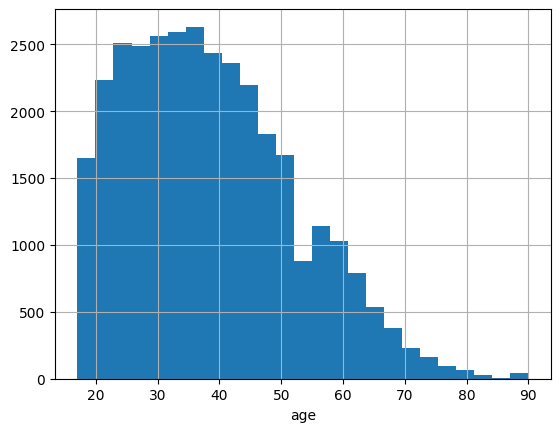

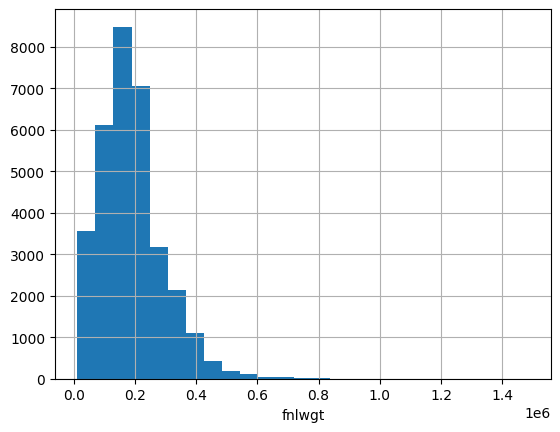

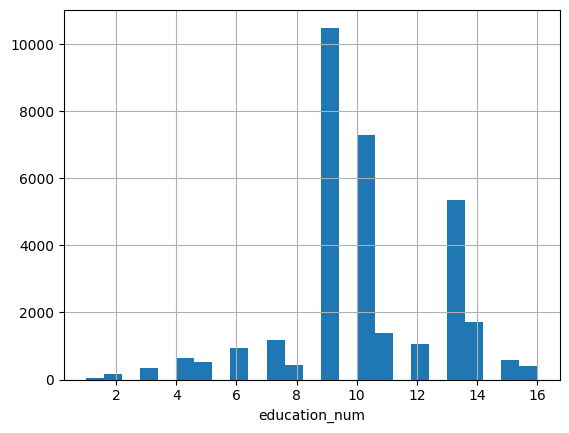

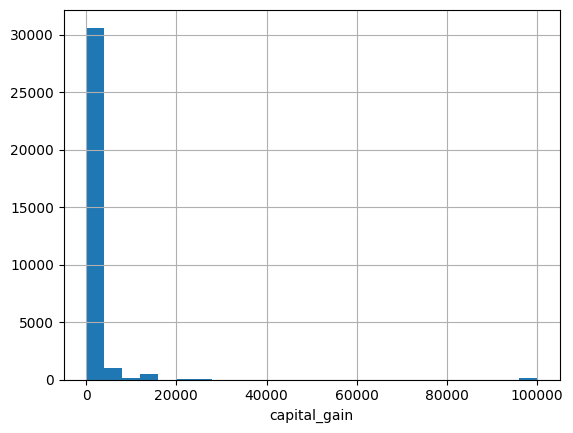

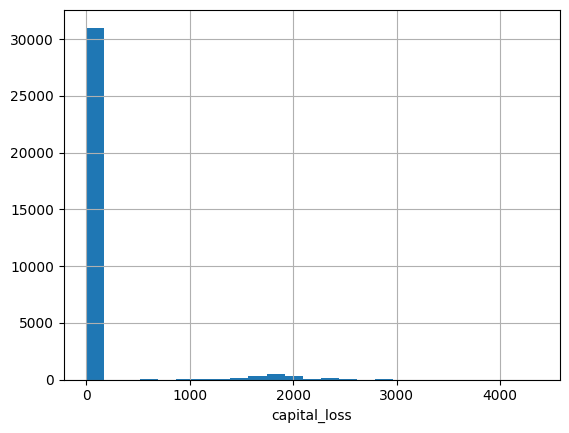

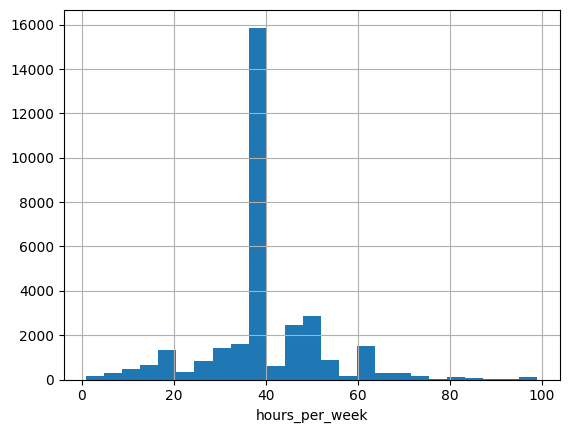

In [10]:
for i in numerical_features:
    data=df.copy()
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.show()

In [11]:
categorical_feaatures=[feature for feature in df.columns if df[feature].dtype=='O' and  feature!='income' ]
categorical_feaatures

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [12]:
df[categorical_feaatures].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [41]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder

In [24]:
stdscaled_df=df.copy()

In [25]:
stdscaler=StandardScaler()
stdscaled_df[numerical_features]=stdscaler.fit_transform(df[numerical_features])
stdscaled_df[numerical_features]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664
...,...,...,...,...,...,...
32556,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650
32557,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664
32558,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664
32559,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530


In [27]:
minmax_df=df.copy()

In [31]:
minmax=MinMaxScaler()
minmax_df[numerical_features]=minmax.fit_transform(df[numerical_features])
minmax_df[numerical_featuresrical_features]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [32]:
## lets consider standard scaled df for further process
df=stdscaled_df.copy()

In [33]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030390,State-gov,-1.063569,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,White,Male,0.148292,-0.216743,-0.035664,United-States,<=50K
1,0.836973,Self-emp-not-inc,-1.008668,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145975,-0.216743,-2.222483,United-States,<=50K
2,-0.042936,Private,0.245040,HS-grad,-0.420679,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
3,1.056950,Private,0.425752,11th,-1.198407,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
4,-0.776193,Private,1.408066,Bachelors,1.134777,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145975,-0.216743,-0.035664,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,Private,0.639678,Assoc-acdm,0.745913,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145975,-0.216743,-0.197650,United-States,<=50K
32557,0.103716,Private,-0.335436,HS-grad,-0.420679,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145975,-0.216743,-0.035664,United-States,>50K
32558,1.423579,Private,-0.358779,HS-grad,-0.420679,Widowed,Adm-clerical,Unmarried,White,Female,-0.145975,-0.216743,-0.035664,United-States,<=50K
32559,-1.216148,Private,0.110930,HS-grad,-0.420679,Never-married,Adm-clerical,Own-child,White,Male,-0.145975,-0.216743,-1.655530,United-States,<=50K


race
sex


In [44]:
df1=df.copy()

In [55]:
categorical_features_label = ['workclass','education','marital_status', 'occupation', 'relationship', 'native_country']
encoder_label = LabelEncoder()
for feature in categorical_features_label:
    df[feature] = encoder_label.fit_transform(df[feature])

In [56]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030390,7,-1.063569,9,1.134777,4,1,1,White,Male,0.148292,-0.216743,-0.035664,39,<=50K
1,0.836973,6,-1.008668,9,1.134777,2,4,0,White,Male,-0.145975,-0.216743,-2.222483,39,<=50K
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,White,Male,-0.145975,-0.216743,-0.035664,39,<=50K
3,1.056950,4,0.425752,1,-1.198407,2,6,0,Black,Male,-0.145975,-0.216743,-0.035664,39,<=50K
4,-0.776193,4,1.408066,9,1.134777,2,10,5,Black,Female,-0.145975,-0.216743,-0.035664,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,4,0.639678,7,0.745913,2,13,5,White,Female,-0.145975,-0.216743,-0.197650,39,<=50K
32557,0.103716,4,-0.335436,11,-0.420679,2,7,0,White,Male,-0.145975,-0.216743,-0.035664,39,>50K
32558,1.423579,4,-0.358779,11,-0.420679,6,1,4,White,Female,-0.145975,-0.216743,-0.035664,39,<=50K
32559,-1.216148,4,0.110930,11,-0.420679,4,1,3,White,Male,-0.145975,-0.216743,-1.655530,39,<=50K


In [66]:
dummies = pd.get_dummies(df['sex'])

# Concatenate the dummies with the original DataFrame
df = pd.concat([df, dummies], axis=1)

In [69]:
df=df.drop('sex',axis=1)

In [71]:
dummies_race=pd.get_dummies(df['race'])
df=pd.concat([df,dummies_race],axis=1)

In [72]:
df=df.drop('race',axis=1)

In [73]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.030390,7,-1.063569,9,1.134777,4,1,1,0.148292,-0.216743,-0.035664,39,<=50K,False,True,False,False,False,False,True
1,0.836973,6,-1.008668,9,1.134777,2,4,0,-0.145975,-0.216743,-2.222483,39,<=50K,False,True,False,False,False,False,True
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,-0.145975,-0.216743,-0.035664,39,<=50K,False,True,False,False,False,False,True
3,1.056950,4,0.425752,1,-1.198407,2,6,0,-0.145975,-0.216743,-0.035664,39,<=50K,False,True,False,False,True,False,False
4,-0.776193,4,1.408066,9,1.134777,2,10,5,-0.145975,-0.216743,-0.035664,5,<=50K,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,4,0.639678,7,0.745913,2,13,5,-0.145975,-0.216743,-0.197650,39,<=50K,True,False,False,False,False,False,True
32557,0.103716,4,-0.335436,11,-0.420679,2,7,0,-0.145975,-0.216743,-0.035664,39,>50K,False,True,False,False,False,False,True
32558,1.423579,4,-0.358779,11,-0.420679,6,1,4,-0.145975,-0.216743,-0.035664,39,<=50K,True,False,False,False,False,False,True
32559,-1.216148,4,0.110930,11,-0.420679,4,1,3,-0.145975,-0.216743,-1.655530,39,<=50K,False,True,False,False,False,False,True


In [76]:
#creating new feature capital profit
df['capital profit']=df['capital_gain']-df['capital_loss']
df['age_hours_ratio'] = df['age'] / df['hours_per_week']

In [77]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,income,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,capital profit,age_hours_ratio
0,0.030390,7,-1.063569,9,1.134777,4,1,1,0.148292,-0.216743,...,<=50K,False,True,False,False,False,False,True,0.365035,-0.852125
1,0.836973,6,-1.008668,9,1.134777,2,4,0,-0.145975,-0.216743,...,<=50K,False,True,False,False,False,False,True,0.070768,-0.376594
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,-0.145975,-0.216743,...,<=50K,False,True,False,False,False,False,True,0.070768,1.203906
3,1.056950,4,0.425752,1,-1.198407,2,6,0,-0.145975,-0.216743,...,<=50K,False,True,False,False,True,False,False,0.070768,-29.636557
4,-0.776193,4,1.408066,9,1.134777,2,10,5,-0.145975,-0.216743,...,<=50K,True,False,False,False,True,False,False,0.070768,21.764215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,4,0.639678,7,0.745913,2,13,5,-0.145975,-0.216743,...,<=50K,True,False,False,False,False,False,True,0.070768,4.298090
32557,0.103716,4,-0.335436,11,-0.420679,2,7,0,-0.145975,-0.216743,...,>50K,False,True,False,False,False,False,True,0.070768,-2.908155
32558,1.423579,4,-0.358779,11,-0.420679,6,1,4,-0.145975,-0.216743,...,<=50K,True,False,False,False,False,False,True,0.070768,-39.916711
32559,-1.216148,4,0.110930,11,-0.420679,4,1,3,-0.145975,-0.216743,...,<=50K,False,True,False,False,False,False,True,0.070768,0.734597


In [81]:
df=df.drop('capital_gain_log',axis=1)

<Axes: xlabel='capital_gain', ylabel='Density'>

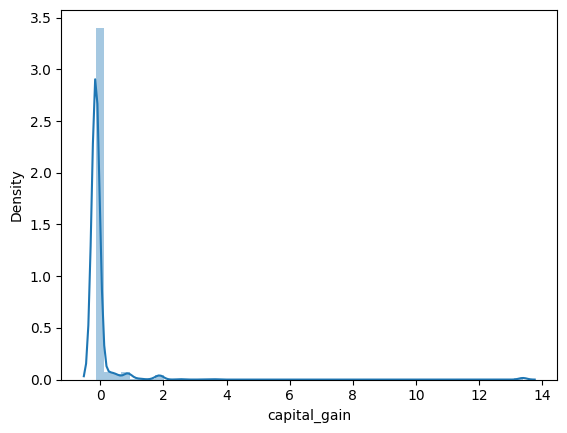

In [82]:
# applying log transformation to capital gai as it more right skewed
sns.distplot(df['capital_gain'])

In [83]:
df['capital_gain']=np.log(df['capital_gain']+1)

In [84]:
df['capital_gain']

0        0.138275
1       -0.157795
2       -0.157795
3       -0.157795
4       -0.157795
           ...   
32556   -0.157795
32557   -0.157795
32558   -0.157795
32559   -0.157795
32560    1.060438
Name: capital_gain, Length: 32537, dtype: float64

In [85]:
from sklearn.ensemble import IsolationForest


In [87]:
isol=IsolationForest(random_state=42)

In [88]:
isol.fit(df[numerical_features])

IsolationForest(random_state=42)

In [89]:
outliers = isol.predict(df[numerical_features])

# Remove outliers
df_cleaned = df[outliers != -1]


In [90]:
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

Original dataset shape: (32537, 22)
Cleaned dataset shape: (28658, 22)


In [91]:
# Compute Pearson correlation coefficient manually
correlation_matrix = df_cleaned[numerical_features].corr()

# Square the absolute values of the correlation coefficients to get the PPS
pps_matrix = correlation_matrix.applymap(lambda x: np.square(abs(x)))

print(pps_matrix)

                     age        fnlwgt  education_num  capital_gain  \
age             1.000000  5.802254e-03       0.001191      0.002213   
fnlwgt          0.005802  1.000000e+00       0.001908      0.000674   
education_num   0.001191  1.907968e-03       1.000000      0.004967   
capital_gain    0.002213  6.735999e-04       0.004967      1.000000   
capital_loss    0.000173  1.024219e-07       0.000014      0.000048   
hours_per_week  0.019167  4.781247e-04       0.013612      0.001833   

                capital_loss  hours_per_week  
age             1.729629e-04        0.019167  
fnlwgt          1.024219e-07        0.000478  
education_num   1.378328e-05        0.013612  
capital_gain    4.770754e-05        0.001833  
capital_loss    1.000000e+00        0.000002  
hours_per_week  2.003130e-06        1.000000  
